In [1]:
#pip install autoviz --user
#liad ben yechiel - 207637414

In [2]:
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from collections import Counter
#from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Call Sample.csv') #read the data to df
df = df.rename(columns={'Service Time': 'Service_Time','Quality Score': 'Quality_Score'})
df.head()

,Site,Client,Supervisor,Agent,Week,Service_Time,Quality_Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1


In [4]:
display(df.info(()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           240 non-null    object 
 1   Client         240 non-null    object 
 2   Supervisor     240 non-null    object 
 3   Agent          240 non-null    int64  
 4   Week           240 non-null    int64  
 5   Service_Time   231 non-null    float64
 6   Quality_Score  234 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.2+ KB


None

In [5]:
mean_Service_Time=df['Service_Time'].mean()
df['Service_Time'].fillna(value=mean_Service_Time, inplace=True)
print('mean_Service_Time' , mean_Service_Time)

mean_Quality_Score=df['Quality_Score'].mean()
df['Quality_Score'].fillna(value=mean_Quality_Score, inplace=True)
print('mean_Quality_Score' , mean_Quality_Score)

#df["Supervisor"] = df["Supervisor"].str.lower()
df['Supervisor'] = df['Supervisor'].str.capitalize() 


mean_Service_Time 475.12554112554113
mean_Quality_Score 6.895299145299149


In [6]:
listtt = Counter(df["Supervisor"])
listtt

Counter({'Brian': 20,
         'Jorge': 19,
         'Jorrge': 1,
         'George': 20,
         'Sara': 1,
         'Sarah': 19,
         'John': 19,
         'Johnathan': 1,
         'Kathy': 20,
         'Eric': 20,
         'Samantha': 20,
         'Adreew': 1,
         'Andrew': 19,
         'David': 20,
         'Julie': 20,
         'Michael': 20})

C:\Users\liadb\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


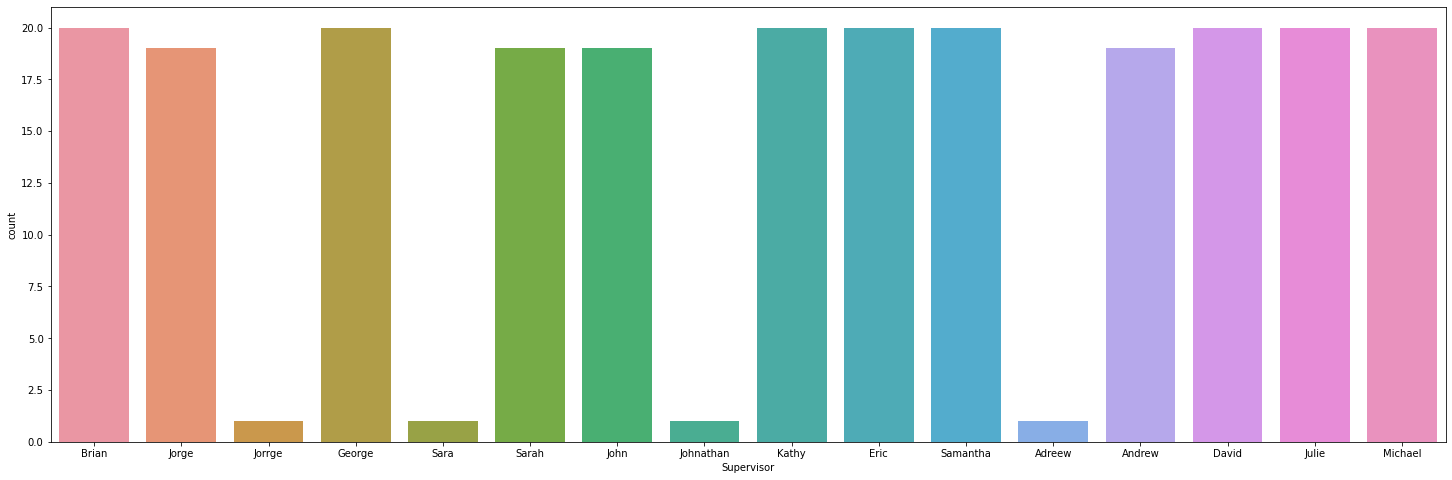

In [7]:
sns.countplot(df['Supervisor']) #Balanced and doesn't have typing errors
plt.gcf().set_size_inches(25, 8)


C:\Users\liadb\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Client', ylabel='count'>

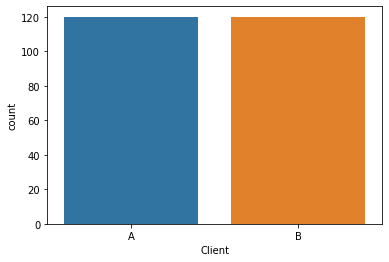

In [8]:
sns.countplot(df['Client']) #Balanced and doesn't have typing errors

C:\Users\liadb\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Site', ylabel='count'>

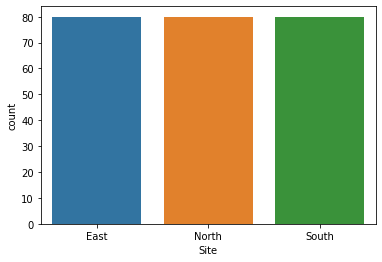

In [9]:
sns.countplot(df['Site']) #Balanced and doesn't have typing errors

In [10]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()






def remove_low(dictionary):
    for row in dictionary:
        if(dictionary[row]) <= 2:
            del dictionary[row]
            return dictionary
    return dictionary
flag = True
while flag:
    old_len = len(listtt)
    listtt = remove_low(listtt)
    new_len = len(listtt)
    if old_len == new_len:
        break

max_simily = 0
for word in df["Supervisor"]:
    max_simily_word = ""
    max_simily = 0
    for unique_word in listtt:
        simily = similar(word, unique_word)
        if simily >= max_simily:
            max_simily = simily
            max_simily_word = unique_word            
    df["Supervisor"] =  df["Supervisor"].replace(word, max_simily_word, regex=True)

In [11]:
listtt = Counter(df["Supervisor"])
listtt

Counter({'Brian': 20,
         'Jorge': 20,
         'George': 20,
         'Sarah': 20,
         'John': 20,
         'Kathy': 20,
         'Eric': 20,
         'Samantha': 20,
         'Andrew': 20,
         'David': 20,
         'Julie': 20,
         'Michael': 20})

<AxesSubplot:>

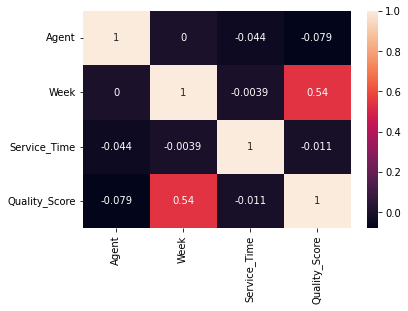

In [12]:
sns.heatmap(df.corr(),annot = True) #check features correlation heatmap

In [13]:
df['ST_Ranks'] = pd.cut(df['Service_Time'],  bins=[0 ,420, 480, 1000], labels=['Low', 'Medium', 'High'])
df['QS_Ranks'] = pd.cut(df['Quality_Score'],  bins=[0 ,6, 8, 10], labels=['Low', 'Medium', 'High'])
df.head(3)

,Site,Client,Supervisor,Agent,Week,Service_Time,Quality_Score,ST_Ranks,QS_Ranks
0,East,A,Brian,41,1,509.000000,6.5,High,Medium
1,East,A,Brian,41,2,505.000000,6.9,High,Medium
2,East,A,Brian,41,3,475.125541,5.9,Medium,Low


<AxesSubplot:ylabel='QS_Ranks'>

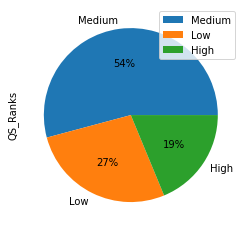

In [14]:
df['QS_Ranks'].value_counts().plot(kind='pie',legend=True,autopct='%.0f%%')

<AxesSubplot:ylabel='ST_Ranks'>

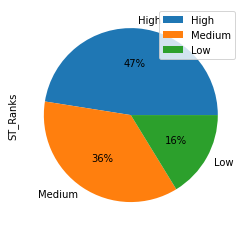

In [15]:
df['ST_Ranks'].value_counts().plot(kind='pie',legend=True,autopct='%.0f%%')

In [16]:
df['Service_time_precents_disincrase'] = df.apply(lambda row: (row.Service_Time/mean_Service_Time -1 ) * -100 , axis = 1)
df['Quality_Score_precents_increase'] = df.apply(lambda row: (row.Quality_Score/mean_Quality_Score -1 ) * 100 , axis = 1)
df['better_performance'] = df.apply(lambda row: 0.5*(row.Quality_Score_precents_increase ) + 0.5*(row.Service_time_precents_disincrase ) , axis = 1)
df.head(3)

,Site,Client,Supervisor,Agent,Week,Service_Time,Quality_Score,ST_Ranks,QS_Ranks,Service_time_precents_disincrase,Quality_Score_precents_increase,better_performance
0,East,A,Brian,41,1,509.000000,6.5,High,Medium,-7.129581,-5.732879,-6.431230
1,East,A,Brian,41,2,505.000000,6.9,High,Medium,-6.287698,0.068175,-3.109762
2,East,A,Brian,41,3,475.125541,5.9,Medium,Low,-0.000000,-14.434459,-7.217230


In [17]:
df.head()

,Site,Client,Supervisor,Agent,Week,Service_Time,Quality_Score,ST_Ranks,QS_Ranks,Service_time_precents_disincrase,Quality_Score_precents_increase,better_performance
0,East,A,Brian,41,1,509.000000,6.5,High,Medium,-7.129581,-5.732879,-6.431230
1,East,A,Brian,41,2,505.000000,6.9,High,Medium,-6.287698,0.068175,-3.109762
2,East,A,Brian,41,3,475.125541,5.9,Medium,Low,-0.000000,-14.434459,-7.217230
3,East,A,Brian,41,4,505.000000,7.1,High,Medium,-6.287698,2.968702,-1.659498
4,East,A,Brian,41,5,511.000000,9.1,High,High,-7.550522,31.973970,12.211724


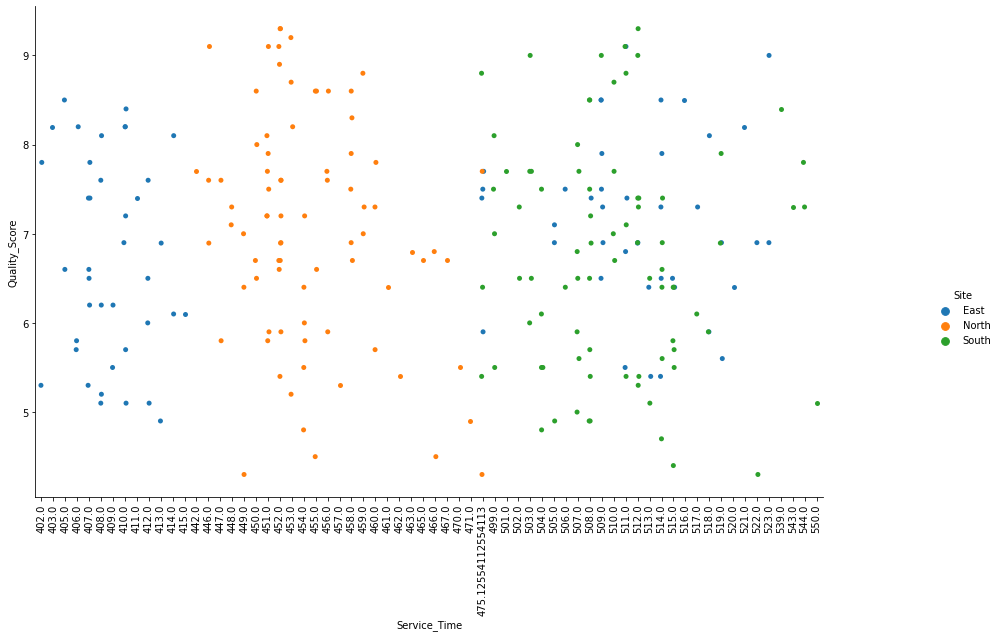

In [18]:
ax = sns.catplot(x="Service_Time", y="Quality_Score",hue = "Site", data=df)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)

[Text(0, 0, '6.2874'),
 Text(0, 0, '6.03958'),
 Text(0, 0, '6.80824'),
 Text(0, 0, '7.48522'),
 Text(0, 0, '7.85605')]

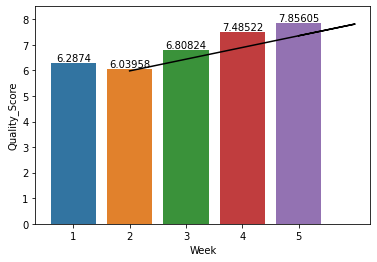

In [19]:

ax4 = sns.barplot(x='Week', y='Quality_Score',data=df, errwidth=0)
x= df["Week"]
y= df["Quality_Score"]
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b , color='black')
ax4.bar_label(ax4.containers[0])



[Text(0, 0, '475.026'),
 Text(0, 0, '476.487'),
 Text(0, 0, '474.357'),
 Text(0, 0, '474.065'),
 Text(0, 0, '475.693')]

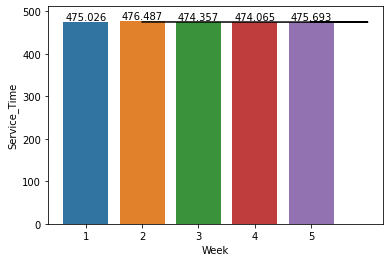

In [20]:

ax4 = sns.barplot(x='Week', y='Service_Time',data=df, errwidth=0)
x= df["Week"]
y= df["Service_Time"]
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b , color='black')
ax4.bar_label(ax4.containers[0])



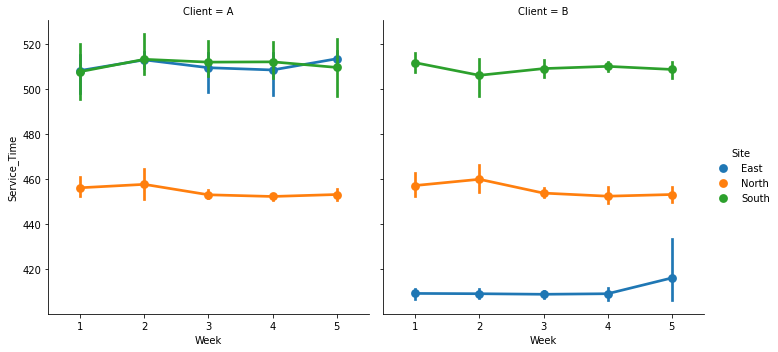

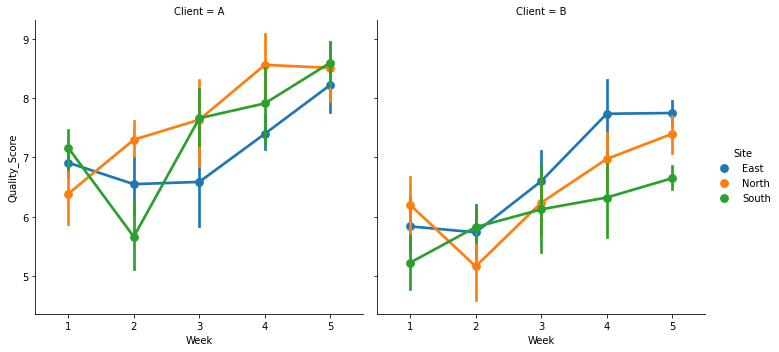

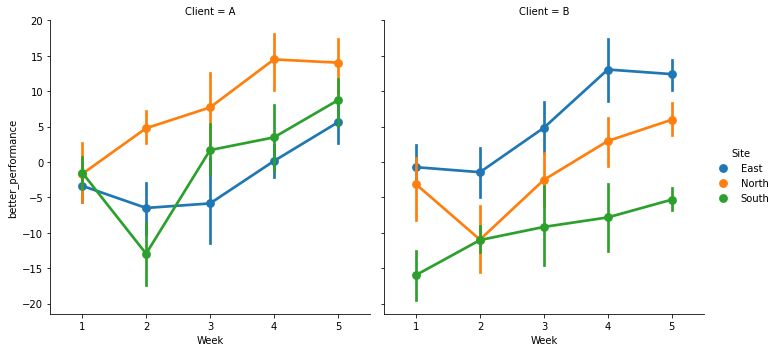

In [21]:
ax2 = sns.catplot(x="Week", y="Service_Time", hue = "Site", kind = "point" ,col = "Client", data=df)
ax3 = sns.catplot(x="Week", y="Quality_Score", hue = "Site", kind = "point" ,col = "Client", data=df)
ax4 = sns.catplot(x="Week", y="better_performance", hue = "Site", kind = "point" ,col = "Client", data=df)

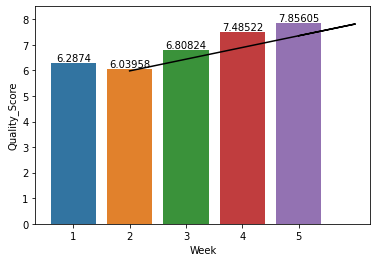

In [22]:
ax5 = sns.barplot(x='Week', y='Quality_Score',data=df, errwidth=0)
ax5.bar_label(ax5.containers[0])
x= df["Week"]
y= df["Quality_Score"]
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b , color='black')

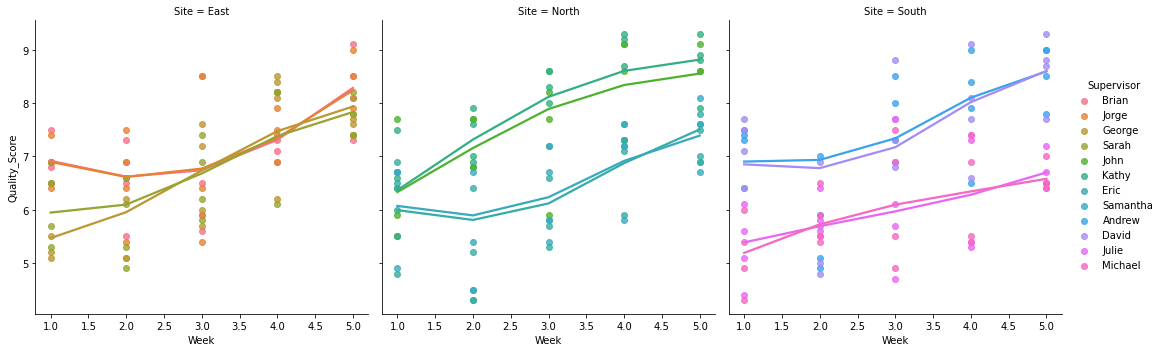

In [23]:
checky = sns.lmplot(x="Week", y="Quality_Score", hue = "Supervisor" , data=df, lowess = True, col = "Site")


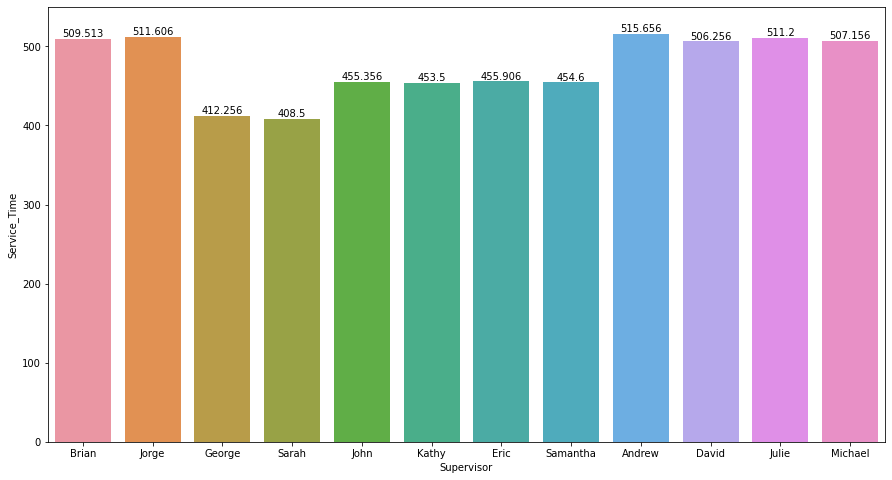

In [24]:
ax_Supervisor_Service = sns.barplot(x='Supervisor', y='Service_Time',data=df, errwidth=0)
ax_Supervisor_Service.bar_label(ax_Supervisor_Service.containers[0])
plt.gcf().set_size_inches(15, 8)


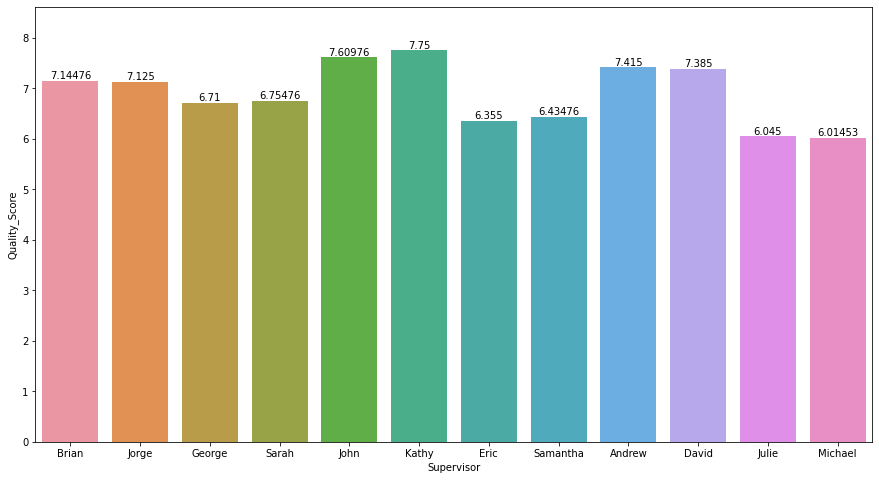

In [25]:
ax_Supervisor_Quality = sns.barplot(x='Supervisor', y='Quality_Score',data=df, errwidth=0)
ax_Supervisor_Quality.bar_label(ax_Supervisor_Quality.containers[0])
plt.gcf().set_size_inches(15, 8)

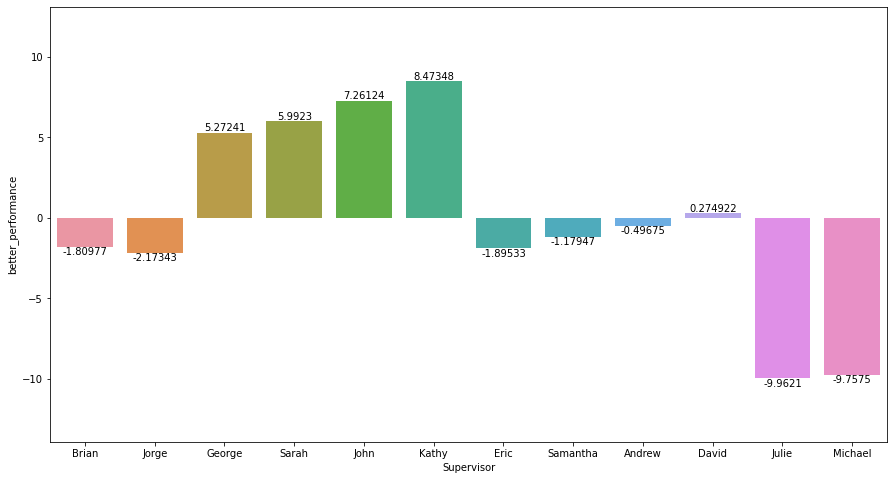

In [26]:
ax6 = sns.barplot(x="Supervisor", y="better_performance",data=df, errwidth=0)
ax6.bar_label(ax6.containers[0])
plt.gcf().set_size_inches(15, 8)


[Text(0, 0, '6.2874'),
 Text(0, 0, '6.03958'),
 Text(0, 0, '6.80824'),
 Text(0, 0, '7.48522'),
 Text(0, 0, '7.85605')]

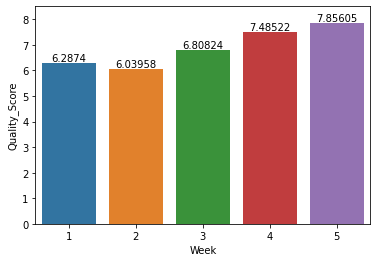

In [27]:
ax5 = sns.barplot(x='Week', y='Quality_Score',data=df, errwidth=0)
ax5.bar_label(ax5.containers[0])

[Text(0, 0, '6.93363'), Text(0, 0, '7.03738'), Text(0, 0, '6.71488')]

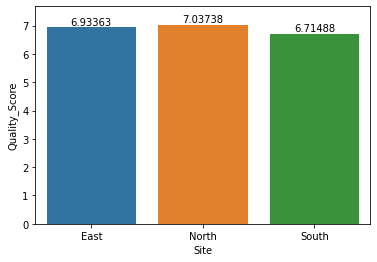

In [28]:
ax_Site_Quality = sns.barplot(x='Site', y='Quality_Score',data=df, errwidth=0)
ax_Site_Quality.bar_label(ax_Site_Quality.containers[0])

[Text(0, 0, '460.469'), Text(0, 0, '454.841'), Text(0, 0, '510.067')]

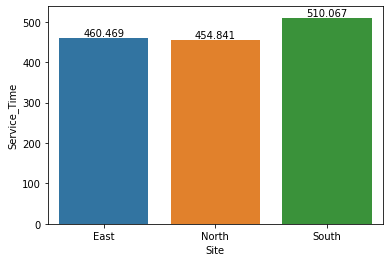

In [29]:
ax_site_Service = sns.barplot(x='Site', y='Service_Time',data=df, errwidth=0)
ax_site_Service.bar_label(ax_site_Service.containers[0])

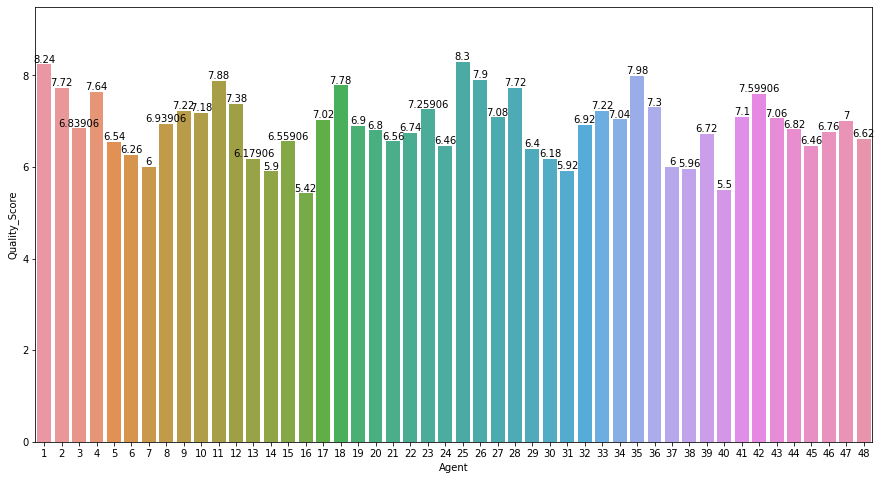

In [30]:
ax_Agents_Quality = sns.barplot(x='Agent', y='Quality_Score',data=df, errwidth=0)
ax_Agents_Quality.bar_label(ax_Agents_Quality.containers[0])
plt.gcf().set_size_inches(15, 8)

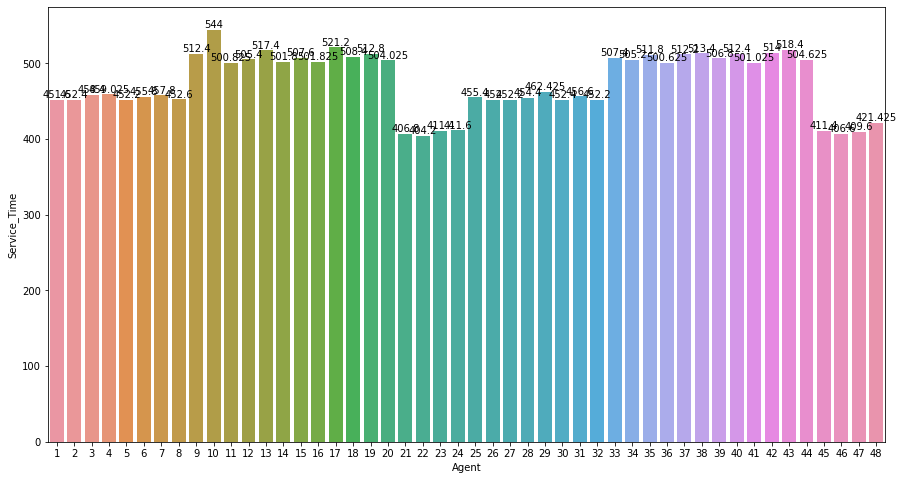

In [31]:
ax_Agents_Service = sns.barplot(x='Agent', y='Service_Time',data=df, errwidth=0)
ax_Agents_Service.bar_label(ax_Agents_Service.containers[0])

plt.gcf().set_size_inches(15, 8)

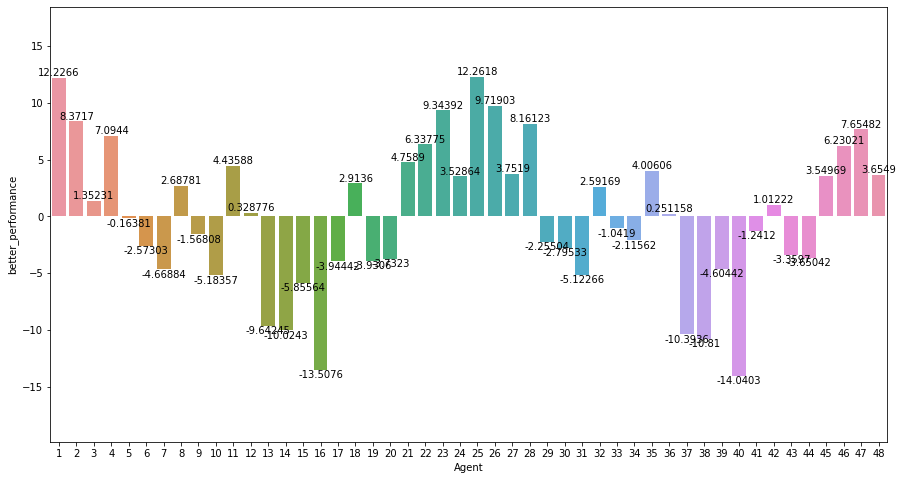

In [32]:
ax_Agent_performance = sns.barplot(x="Agent", y="better_performance",data=df, errwidth=0)
ax_Agent_performance.bar_label(ax_Agent_performance.containers[0])
plt.gcf().set_size_inches(15, 8)


[Text(0, 0, '491.981'), Text(0, 0, '458.27')]

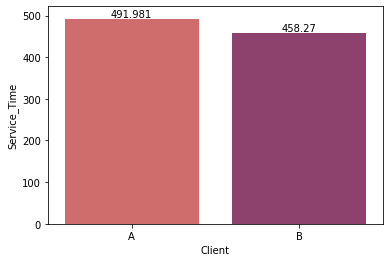

In [33]:
ax_Client_service = sns.barplot(x="Client", y="Service_Time", errwidth=0, data=df,palette="flare")
ax_Client_service.bar_label(ax_Client_service.containers[0])



[Text(0, 0, '7.40492'), Text(0, 0, '6.38568')]

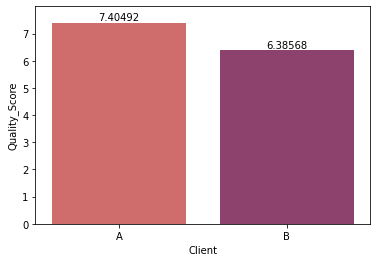

In [34]:
ax_Client_Quality = sns.barplot(x="Client", y="Quality_Score", errwidth=0, data=df,palette="flare")
ax_Client_Quality.bar_label(ax_Client_Quality.containers[0])

,Quality_Score
Site,
East,6.933632
North,7.037382
South,6.714882


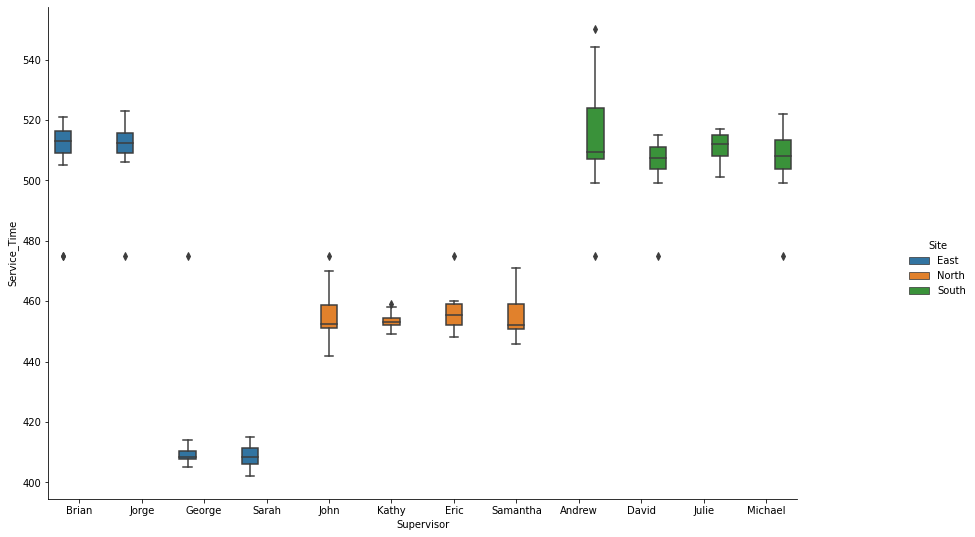

In [35]:
ax_Client_Quality = sns.catplot(x="Supervisor", y="Service_Time",hue = "Site", data=df,kind = "box")
plt.gcf().set_size_inches(15, 8)
df[["Supervisor","Quality_Score","Site"]].groupby(["Site"]).mean()

In [36]:
confusion_matrix_Site_QS = pd.crosstab(df['Site'], df['QS_Ranks'])
confusion_matrix_Site_QS

QS_Ranks,Low,Medium,High
Site,,,
East,18,46,16
North,20,43,17
South,27,41,12


In [37]:
confusion_matrix_Client_QS = pd.crosstab(df['Client'], df['QS_Ranks'])
confusion_matrix_Client_QS

QS_Ranks,Low,Medium,High
Client,,,
A,18,66,36
B,47,64,9


In [38]:
confusion_matrix_Client_ST = pd.crosstab(df['Client'], df['ST_Ranks'])
confusion_matrix_Client_ST

ST_Ranks,Low,Medium,High
Client,,,
A,0,45,75
B,39,42,39
